In [7]:
from IMPA.dataset.data_loader import CellDataLoader
from IMPA.solver import IMPAmodule
from omegaconf import OmegaConf
from tqdm import tqdm
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import os
import torch
import yaml

In [8]:
class Args:
    def __init__(self, dictionary):
        self.__dict__ = dictionary

    def __getattr__(self, key):
        if key in self.__dict__:
            return self.__dict__[key]
        else:
            raise AttributeError(f"'DictToObject' object has no attribute '{key}'")

    def __call__(self, key):
        return self.__getattr__(key)

def t2np(t):
    return ((t.permute(0,2, 3, 1) + 1) / 2).clamp(0,1).cpu().numpy()

In [9]:
import yaml

with open("/home/icb/alessandro.palma/environment/IMPA/IMPA/config_hydra/config/cpg0000_multimodal.yaml", "r") as file:
    config = yaml.safe_load(file)

args = OmegaConf.create(config)

dest_dir = "/home/icb/alessandro.palma/environment/IMPA/IMPA/project_folder/experiments/20241014_ada05513-1a50-4f25-9a08-39ad46f98a82_cpg0000_multimodal"

In [10]:
args

{'task_name': 'cpg0000_multimodal', 'img_size': 96, 'latent_dim': 100, 'hidden_dim': 512, 'style_dim': 32, 'stochastic': True, 'z_dimension': 20, 'dim_in': 64, 'lambda_reg': 1, 'lambda_cyc': 1, 'lambda_sty': 1, 'lambda_ds': 1, 'total_epochs': 100, 'ds_iter': 200000, 'resume_iter': 0, 'batch_size': 32, 'val_batch_size': 20, 'lr': 0.0001, 'f_lr': 0.0001, 'beta1': 0, 'beta2': 0.99, 'weight_decay': 0.0001, 'num_outs_per_domain': 10, 'single_style': True, 'ood_set': None, 'mol_list': None, 'balanced': False, 'trainable_emb': False, 'dataset_name': 'cpg0000', 'n_channels': 5, 'num_workers': 6, 'seed': 42, 'image_path': '/home/icb/alessandro.palma/environment/IMPA/IMPA/project_folder/datasets/cpg0000/cpg0000_u2os_normalized_segmented_large_transported', 'data_index_path': '/home/icb/alessandro.palma/environment/IMPA/IMPA/project_folder/datasets/cpg0000/metadata/metadata_large_gene2vec.csv', 'experiment_directory': '../project_folder/experiments', 'sample_dir': 'sample', 'checkpoint_dir': 'che

In [11]:
dataloader = CellDataLoader(args)

{'CRISPR': 328, 'Compound': 1224, 'ORF': 456}


In [12]:
solver = IMPAmodule(args, dest_dir, dataloader)
solver._load_checkpoint(100)

Number of parameters in generator: 24102789
Number of parameters in style_encoder: 14314208
Number of parameters in discriminator: 14681003
Number of parameters in mapping_network: 66272
Initializing embedding_matrix...
Initializing generator...
Initializing style_encoder...
Initializing discriminator...
Initializing mapping_network...
IMPAmodule(
  (embedding_matrix): ModuleList(
    (0): Embedding(296, 328)
    (1): Embedding(296, 1224)
    (2): Embedding(155, 456)
  )
  (generator): DataParallel(
    (module): Generator(
      (from_rgb): Conv2d(5, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (encode): ModuleList(
        (0): ResBlk(
          (actv): LeakyReLU(negative_slope=0.2)
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (norm1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
          (norm2

In [13]:
train_dataloader = dataloader.train_dataloader()
val_dataloader = dataloader.val_dataloader()

**Check a bunch of drugs**

In [15]:
import pandas as pd
data_index = pd.read_csv("/home/icb/alessandro.palma/environment/IMPA/IMPA/project_folder/datasets/cpg0000/metadata/metadata_large_gene2vec.csv")

In [17]:
pert_to_inspect = ["BRD-K45293975-001-02-0"]

dict_to_transform = {"CRISPR": [],
                    "CPD": [],
                    "ORF": []}

In [36]:
dataloader.mol2id["Compound"]

{'BRD-A00827783-001-24-6': 0,
 'BRD-A01078468-001-14-8': 1,
 'BRD-A07207424-001-14-0': 2,
 'BRD-A08187463-001-12-9': 3,
 'BRD-A09722536-002-18-0': 4,
 'BRD-A10188456-001-04-9': 5,
 'BRD-A10739734-003-09-8': 6,
 'BRD-A15397381-001-02-5': 7,
 'BRD-A18763547-300-06-3': 8,
 'BRD-A18992208-003-02-7': 9,
 'BRD-A20697603-001-07-2': 10,
 'BRD-A22032524-074-09-9': 11,
 'BRD-A22713669-001-04-3': 12,
 'BRD-A23124853-001-01-4': 13,
 'BRD-A24122750-001-03-7': 14,
 'BRD-A25569250-001-03-3': 15,
 'BRD-A30815329-001-12-1': 16,
 'BRD-A36217750-001-16-3': 17,
 'BRD-A37704979-001-12-3': 18,
 'BRD-A43005764-003-01-5': 19,
 'BRD-A48180038-003-24-3': 20,
 'BRD-A54139254-001-09-2': 21,
 'BRD-A58048407-001-20-4': 22,
 'BRD-A63310107-001-04-8': 23,
 'BRD-A63444178-001-01-5': 24,
 'BRD-A64173453-015-03-1': 25,
 'BRD-A65597028-003-08-1': 26,
 'BRD-A69636825-003-04-7': 27,
 'BRD-A69651145-003-11-4': 28,
 'BRD-A72351335-001-04-5': 29,
 'BRD-A72483914-001-03-7': 30,
 'BRD-A72767275-003-01-6': 31,
 'BRD-A74391928-05

In [62]:
transf_images = {}
real_images = []

with torch.no_grad():
    for batch in tqdm(train_dataloader):
        # Sample control 
        X_ctr = batch["X"][0]
        real_images.append(t2np(X_ctr.detach().cpu()))
        for cpd in dataloader.mol2id["Compound"]:
            # Collect predictions per perturbation 
            if cpd not in transf_images:
                transf_images[cpd] = []
            z = torch.randn(X_ctr.shape[0], args.z_dimension).cuda()
            id_pert = dataloader.mol2id["Compound"][pert]*torch.ones(X_ctr.shape[0]).long().cuda()
            y = solver.embedding_matrix[1](id_pert)
            y = torch.cat([y, z], dim=1)
            y = solver.nets.mapping_network(y, None, 1)
            _, X_generated = solver.nets.generator(X_ctr, y)
            transf_images[cpd].append(t2np(X_generated.detach().cpu())) 
            break

  1%|          | 12/2232 [00:05<15:58,  2.32it/s] 


KeyboardInterrupt: 

In [63]:
transf_images = {key: np.vstack(value) for key,value in transf_images.items()}
real_images = np.vstack(real_images)

In [64]:
real_images.shape

(384, 96, 96, 5)

In [65]:
transf_images[list(transf_images.keys())[0]].shape

(384, 96, 96, 5)

BRD-A00827783-001-24-6
real


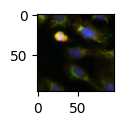

transf


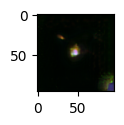

real


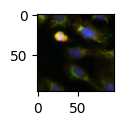

transf


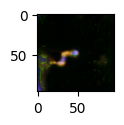

real


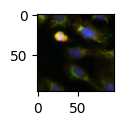

transf


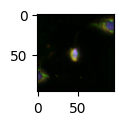

real


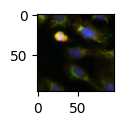

transf


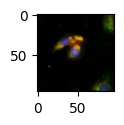

BRD-A00827783-001-24-6
real


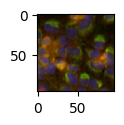

transf


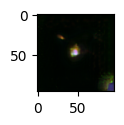

real


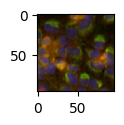

transf


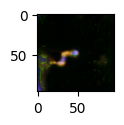

real


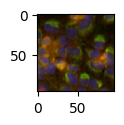

transf


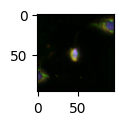

real


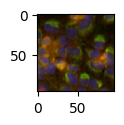

transf


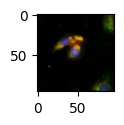

BRD-A00827783-001-24-6
real


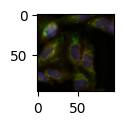

transf


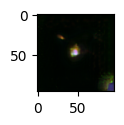

real


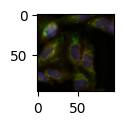

transf


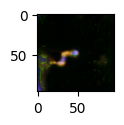

real


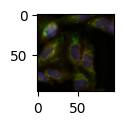

transf


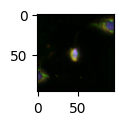

real


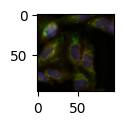

transf


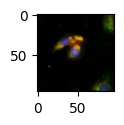

BRD-A00827783-001-24-6
real


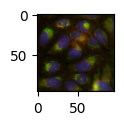

transf


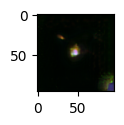

real


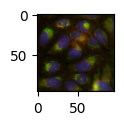

transf


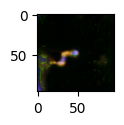

real


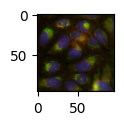

transf


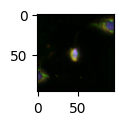

real


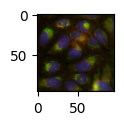

transf


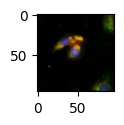

BRD-A00827783-001-24-6
real


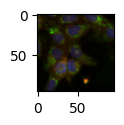

transf


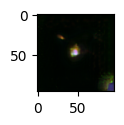

real


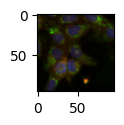

transf


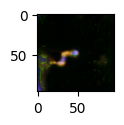

real


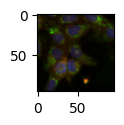

transf


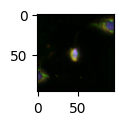

real


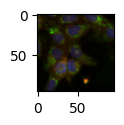

transf


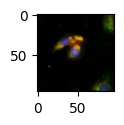

BRD-A00827783-001-24-6
real


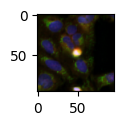

transf


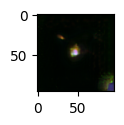

real


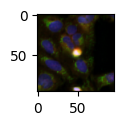

transf


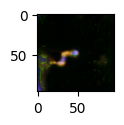

real


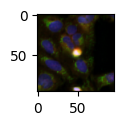

transf


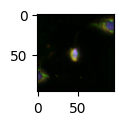

real


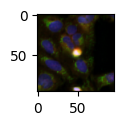

transf


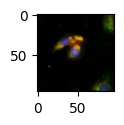

BRD-A00827783-001-24-6
real


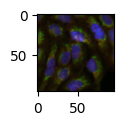

transf


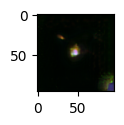

real


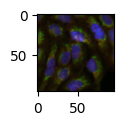

transf


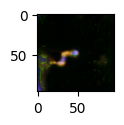

real


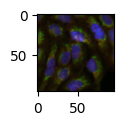

transf


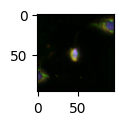

real


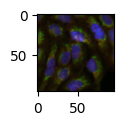

transf


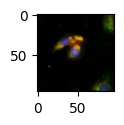

BRD-A00827783-001-24-6
real


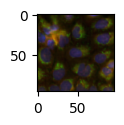

transf


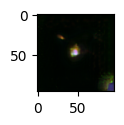

real


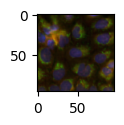

transf


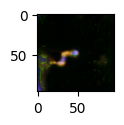

real


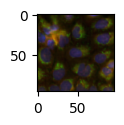

transf


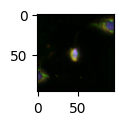

real


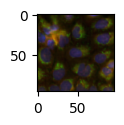

transf


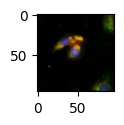

BRD-A00827783-001-24-6
real


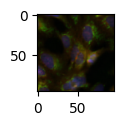

transf


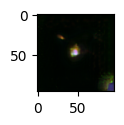

real


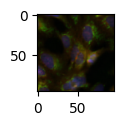

transf


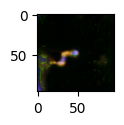

real


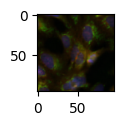

transf


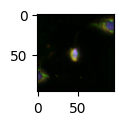

real


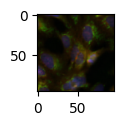

transf


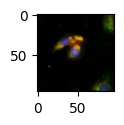

BRD-A00827783-001-24-6
real


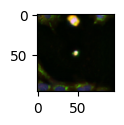

transf


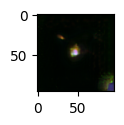

real


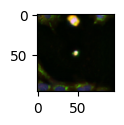

transf


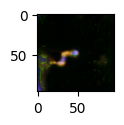

real


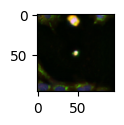

transf


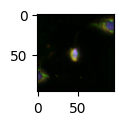

real


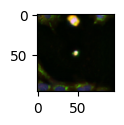

transf


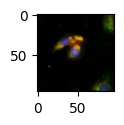

BRD-A00827783-001-24-6
real


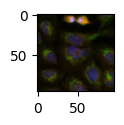

transf


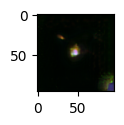

real


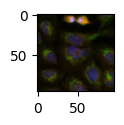

transf


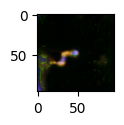

real


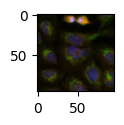

transf


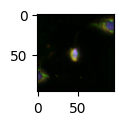

real


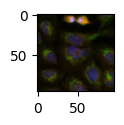

transf


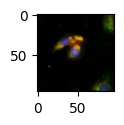

BRD-A00827783-001-24-6
real


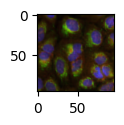

transf


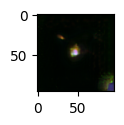

real


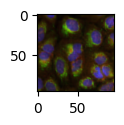

transf


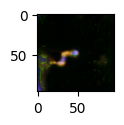

real


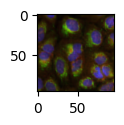

transf


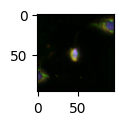

real


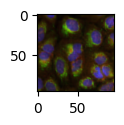

transf


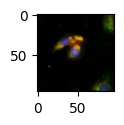

BRD-A00827783-001-24-6
real


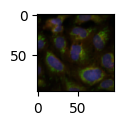

transf


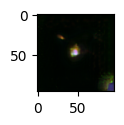

real


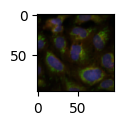

transf


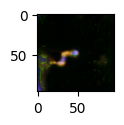

real


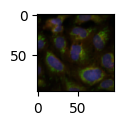

transf


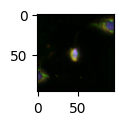

real


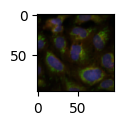

transf


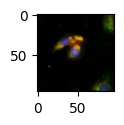

BRD-A00827783-001-24-6
real


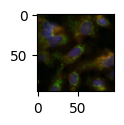

transf


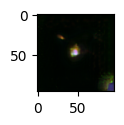

real


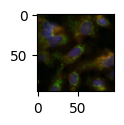

transf


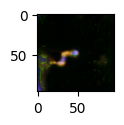

real


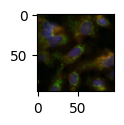

transf


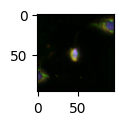

real


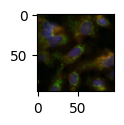

transf


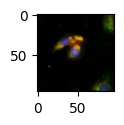

BRD-A00827783-001-24-6
real


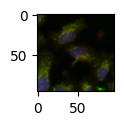

transf


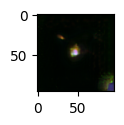

real


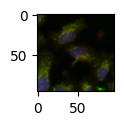

transf


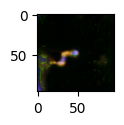

real


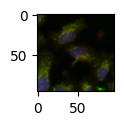

transf


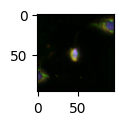

real


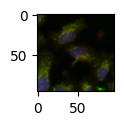

transf


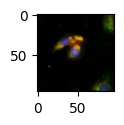

BRD-A00827783-001-24-6
real


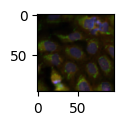

transf


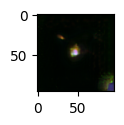

real


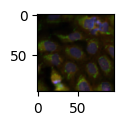

transf


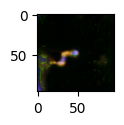

real


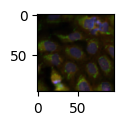

transf


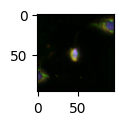

real


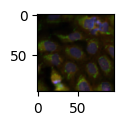

transf


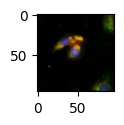

BRD-A00827783-001-24-6
real


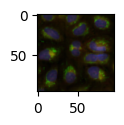

transf


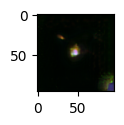

real


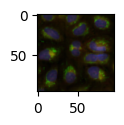

transf


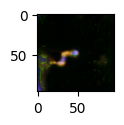

real


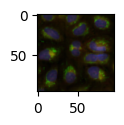

transf


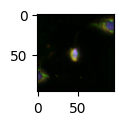

real


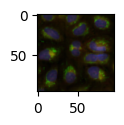

transf


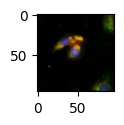

BRD-A00827783-001-24-6
real


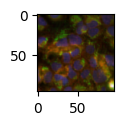

transf


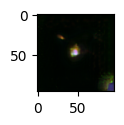

real


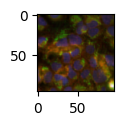

transf


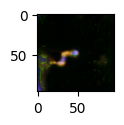

real


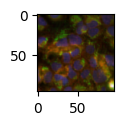

transf


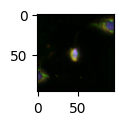

real


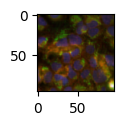

transf


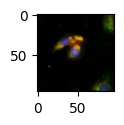

BRD-A00827783-001-24-6
real


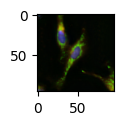

transf


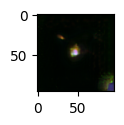

real


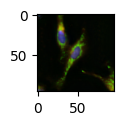

transf


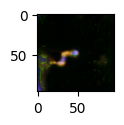

real


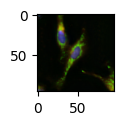

transf


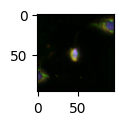

real


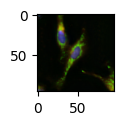

transf


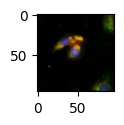

BRD-A00827783-001-24-6
real


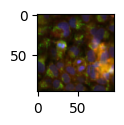

transf


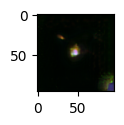

real


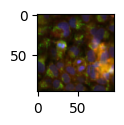

transf


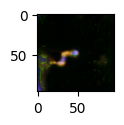

real


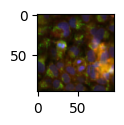

transf


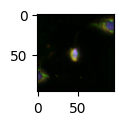

real


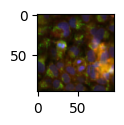

transf


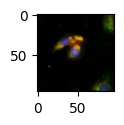

BRD-A00827783-001-24-6
real


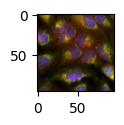

transf


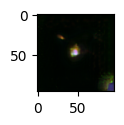

real


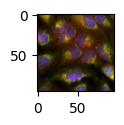

transf


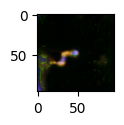

real


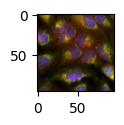

transf


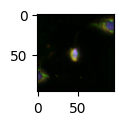

real


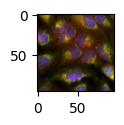

transf


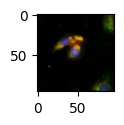

BRD-A00827783-001-24-6
real


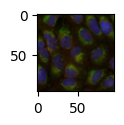

transf


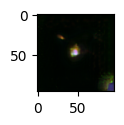

real


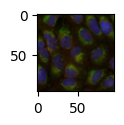

transf


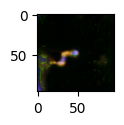

real


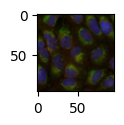

transf


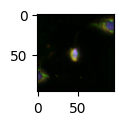

real


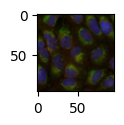

transf


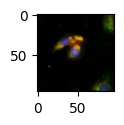

BRD-A00827783-001-24-6
real


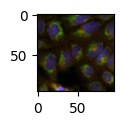

transf


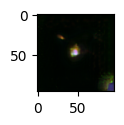

real


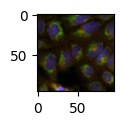

transf


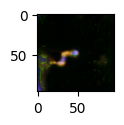

real


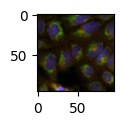

transf


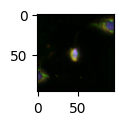

real


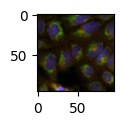

transf


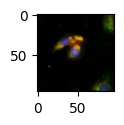

BRD-A00827783-001-24-6
real


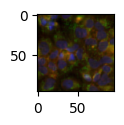

transf


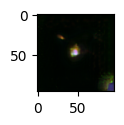

real


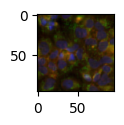

transf


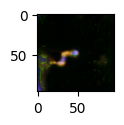

real


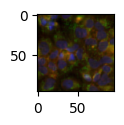

transf


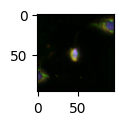

real


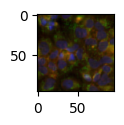

transf


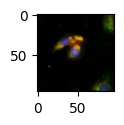

BRD-A00827783-001-24-6
real


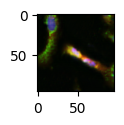

transf


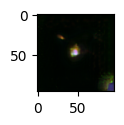

real


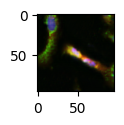

transf


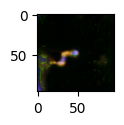

real


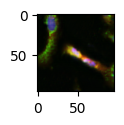

transf


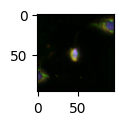

real


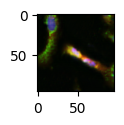

transf


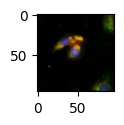

BRD-A00827783-001-24-6
real


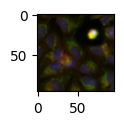

transf


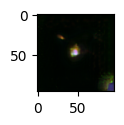

real


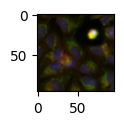

transf


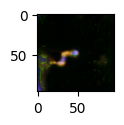

real


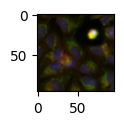

transf


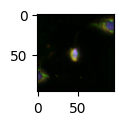

real


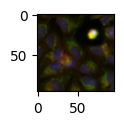

transf


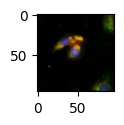

BRD-A00827783-001-24-6
real


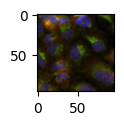

transf


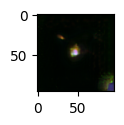

real


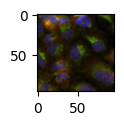

transf


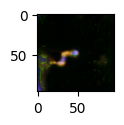

real


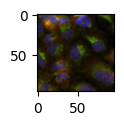

transf


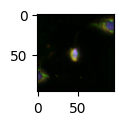

real


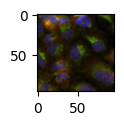

transf


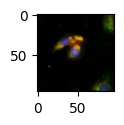

BRD-A00827783-001-24-6
real


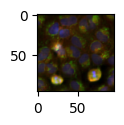

transf


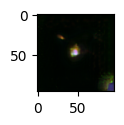

real


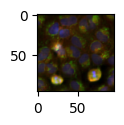

transf


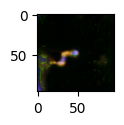

real


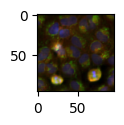

transf


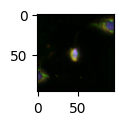

real


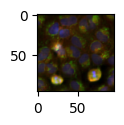

transf


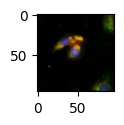

BRD-A00827783-001-24-6
real


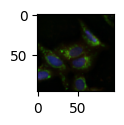

transf


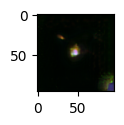

real


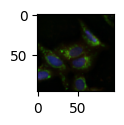

transf


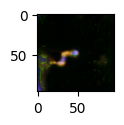

real


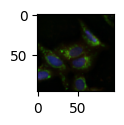

transf


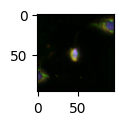

real


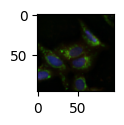

transf


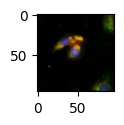

BRD-A00827783-001-24-6
real


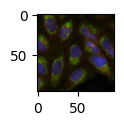

transf


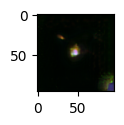

real


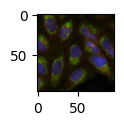

transf


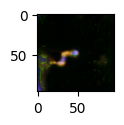

real


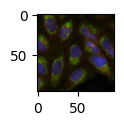

transf


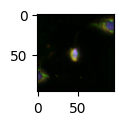

real


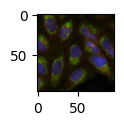

transf


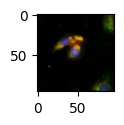

BRD-A00827783-001-24-6
real


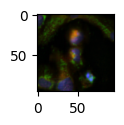

transf


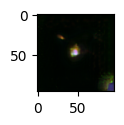

real


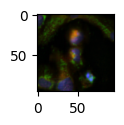

transf


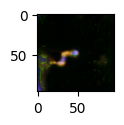

real


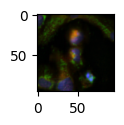

transf


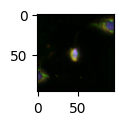

real


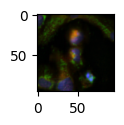

transf


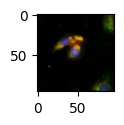

BRD-A00827783-001-24-6
real


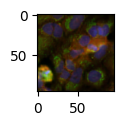

transf


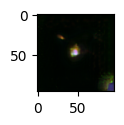

real


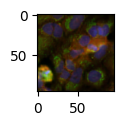

transf


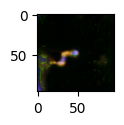

real


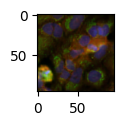

transf


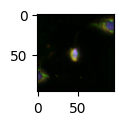

real


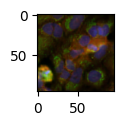

transf


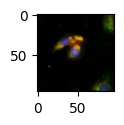

BRD-A00827783-001-24-6
real


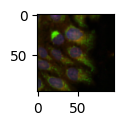

transf


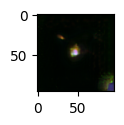

real


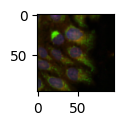

transf


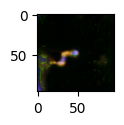

real


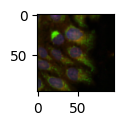

transf


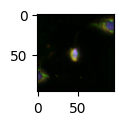

real


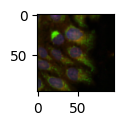

transf


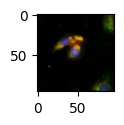

BRD-A00827783-001-24-6
real


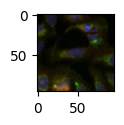

transf



KeyboardInterrupt



In [67]:
for i, obs in enumerate(real_images):
    for pert in transf_images:
        print(pert)
        for i in range(len(batch)):
            print("real")
            plt.figure(figsize=(1,1))
            plt.imshow(obs[:,:,[0,3,4]])
            plt.show()
            print("transf")
            plt.figure(figsize=(1,1))
            plt.imshow(transf_images[pert][i][:,:,[0,3,4]])
            plt.show()        